In [1]:
# Importing the Packages
import pandas as pd
import sweetviz as sv
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud,STOPWORDS

In [2]:
# Reading Not The Onion CSV File
df = pd.read_csv("nto_to_final.csv")

In [3]:
#Printing shape and first 5 rows of the Dataset

print("\n", df.shape)

df.head()


 (31206, 8)


,label,author,created_utc,num_comments,score,title,url,post_body
0,1,kremor,1645405066,0,1,Parents Forced To Explain Thrill Of Having Sex...,https://www.theonion.com/parents-forced-to-exp...,SAN DIEGOâ€”Instructing their confused 4-year-...
1,1,El_Zarco,1645281895,0,1,Posh Restaurant Has Cucumber Slices Floating I...,https://www.theonion.com/posh-restaurant-has-c...,NaN
2,1,Sanlear,1645268793,0,1,Painted Rocksnail Knows It Really Fucked If An...,https://www.theonion.com/painted-rocksnail-kno...,"WOLF CREEK, ALâ€”Reacting with dismay to news ..."
3,1,Additional_Barber_30,1645212992,1,1,Why has The Onion gotten so much worse recenâ€”,https://i.redd.it/vslffdyd9ni81.jpg,NaN
4,1,heavyLobster,1645146992,0,1,Boarâ€™s Head Unveils New Funfetti Birthday Ham,https://www.theonion.com/boar-s-head-unveils-n...,"SARASOTA, FLâ€”In a statement that confirmed c..."


In [4]:
# Rearranging the columns

df = df[['title','post_body','author','num_comments','score','url','created_utc','label']]

df

,title,post_body,author,num_comments,score,url,created_utc,label
0,Parents Forced To Explain Thrill Of Having Sex...,SAN DIEGOâ€”Instructing their confused 4-year-...,kremor,0,1,https://www.theonion.com/parents-forced-to-exp...,1645405066,1
1,Posh Restaurant Has Cucumber Slices Floating I...,NaN,El_Zarco,0,1,https://www.theonion.com/posh-restaurant-has-c...,1645281895,1
2,Painted Rocksnail Knows It Really Fucked If An...,"WOLF CREEK, ALâ€”Reacting with dismay to news ...",Sanlear,0,1,https://www.theonion.com/painted-rocksnail-kno...,1645268793,1
3,Why has The Onion gotten so much worse recenâ€”,NaN,Additional_Barber_30,1,1,https://i.redd.it/vslffdyd9ni81.jpg,1645212992,1
4,Boarâ€™s Head Unveils New Funfetti Birthday Ham,"SARASOTA, FLâ€”In a statement that confirmed c...",heavyLobster,0,1,https://www.theonion.com/boar-s-head-unveils-n...,1645146992,1
...,...,...,...,...,...,...,...,...
31201,â€˜Duneâ€™ Star Stellan Skarsgard Wanted More ...,Stellan SkarsgÃ¥rd in â€œDuneâ€ (Warner Bros....,Antishill_Artillery,2,1,https://www.google.com/amp/s/www.thewrap.com/d...,1635402386,0
31202,Beyond tasteless,Donald Trump Jr. is selling T-shirts on his we...,citizen-of-the-earth,2,1,https://thehill.com/blogs/in-the-know/in-the-k...,1635402239,0
31203,Beyond tasteless,Donald Trump Jr. has begun selling merchandise...,citizen-of-the-earth,2,1,https://www.newsweek.com/donald-trump-jr-selli...,1635402069,0
31204,Beyond tasteless,Donald Trump Jr has begun selling merchandise ...,citizen-of-the-earth,2,1,https://www.independent.co.uk/news/world/ameri...,1635401956,0


In [5]:
# Checking for Null values
df.isna().any()

title           False
post_body        True
author          False
num_comments    False
score           False
url             False
created_utc     False
label           False
dtype: bool

In [6]:
# Check for null values
df.isna().sum()

title              0
post_body       2775
author             0
num_comments       0
score              0
url                0
created_utc        0
label              0
dtype: int64

In [7]:
# Printing summary of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31206 entries, 0 to 31205
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         31206 non-null  object
 1   post_body     28431 non-null  object
 2   author        31206 non-null  object
 3   num_comments  31206 non-null  object
 4   score         31206 non-null  object
 5   url           31206 non-null  object
 6   created_utc   31206 non-null  object
 7   label         31206 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 1.9+ MB


In [8]:
# Printing number of unique values each column has 

df.nunique(dropna = True)

title           25849
post_body       21839
author          10757
num_comments      387
score             847
url             27363
created_utc     30939
label               2
dtype: int64

In [9]:
#Dropping URL column

df_data = df.drop(columns = ['url'])

In [10]:
# Instead of dropping NULL values, I feel its better to replace it with titles. So that we dont loose data

In [11]:
#Dropping NULL values

#df_data.dropna(inplace=True)

#print("\n", df_data.shape)

#2775 records were dropped because postbody has null values.

In [10]:
# Checking the shape of data
print("\n", df_data.shape)


 (31206, 7)


In [11]:
# Replacing na values in post_body attribute with data from the title attribute w.r.to same index & row

df_data.post_body.fillna(df_data.title, inplace=True)

In [12]:
# Checking number of unique values w.r.to each attribute
df_data.nunique(dropna = True)

title           25849
post_body       24320
author          10757
num_comments      387
score             847
created_utc     30939
label               2
dtype: int64

In [13]:
# Checking the count of null values
df_data.isna().sum()

title           0
post_body       0
author          0
num_comments    0
score           0
created_utc     0
label           0
dtype: int64

In [14]:
#Dropping na values
df_data.dropna(inplace=True)

In [57]:
# Function to clean data

def clean_data(nto_to):
    # Replacing not upper case & not lower case letters with space
    df_data['title'] = df_data['title'].str.replace('[^A-Za-z]',' ')
    df_data['post_body'] = df_data['post_body'].str.replace('[^A-Za-z]',' ')
    df_data['author'] = df_data['author'].str.replace('[^A-Za-z]',' ')

    # Replacing \w\s(not word not white space group) with space
    df_data['title'] = df_data['title'].str.replace('[^\w\s]',' ')
    df_data['post_body'] = df_data['post_body'].str.replace('[^\w\s]',' ')
    df_data['author'] = df_data['author'].str.replace('[^\w\s]',' ')
    
    # Removing the spaces between the words
    df_data['title'] = df_data['title'].str.replace("  "," ")
    df_data['post_body'] = df_data['post_body'].str.replace("  "," ")
    df_data['author'] = df_data['author'].str.replace("  "," ")
    
    # Transform all text to lowercase
    df_data['title'] = df_data['title'].str.lower()
    df_data['post_body'] = df_data['post_body'].str.lower()
    df_data['author'] = df_data['author'].str.lower()
    
    print("New shape:", nto_to.shape)
    return nto_to.head()

In [58]:
# Call clean_data
clean_data(df_data)

# Printing new shape of the data
print("\n", df_data.shape)

New shape: (31204, 7)

 (31204, 7)


In [59]:
# Dropping non-numeric rows from score attribute
df_data = df_data[df_data.score.apply(lambda x: x.isnumeric())]

In [60]:
print('\n', df_data.shape)
# 2 records of data got dropped after running dropping non-numeric rows from score attribute


 (31204, 7)


In [61]:
#Saving to csv
# index = False will avoid creating unnamed column in the CSV file.
df_data.to_csv('semi_processed_nto_to.csv', index = False)

In [62]:
# Converting UTC to EST

df_time = pd.read_csv("semi_processed_nto_to.csv")
utc_list = df_time['created_utc'].to_list()
local_time_year = []
local_time_month = []
local_time_day = []
local_time_hour = []
local_time_minute = []
local_time_seconds = []

for utc in utc_list:    
    lt = datetime.datetime.fromtimestamp(utc)
    lt_str = str(lt)    
    time_date_array = lt_str.split(' ', 2)
    date = time_date_array[0]
    time = time_date_array[1]
    date_array = date.split('-', 3)
    time_array = time.split(':', 3)
        
    local_time_year.append(date_array[0])
    local_time_month.append(date_array[1])
    local_time_day.append(date_array[2])

    local_time_hour.append(time_array[0])
    local_time_minute.append(time_array[1])
    local_time_seconds.append(time_array[2])
    

df_time['local_time_year'] = local_time_year
df_time['local_time_month'] = local_time_month
df_time['local_time_day'] = local_time_day
df_time['local_time_hour'] = local_time_hour
df_time['local_time_minute'] = local_time_minute
df_time['local_time_second'] = local_time_seconds

# Savving the converted time into a new csv file
df_time.to_csv('preprocessed_nto_to.csv', index = False)

In [63]:
df_nto_to = pd.read_csv('preprocessed_nto_to.csv')

In [64]:
# Checking new shape and info of the data
print('\n', df_nto_to.shape)

df_nto_to.info()


 (31204, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31204 entries, 0 to 31203
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   title              31204 non-null  object
 1   post_body          31204 non-null  object
 2   author             31204 non-null  object
 3   num_comments       31204 non-null  int64 
 4   score              31204 non-null  int64 
 5   created_utc        31204 non-null  int64 
 6   label              31204 non-null  int64 
 7   local_time_year    31204 non-null  int64 
 8   local_time_month   31204 non-null  int64 
 9   local_time_day     31204 non-null  int64 
 10  local_time_hour    31204 non-null  int64 
 11  local_time_minute  31204 non-null  int64 
 12  local_time_second  31204 non-null  int64 
dtypes: int64(10), object(3)
memory usage: 3.1+ MB


In [65]:
#Dropping created_utc, local_time_minute and local_time_second columns

df_nto_to = df_nto_to.drop(columns = ['created_utc','local_time_minute','local_time_second','local_time_hour','local_time_day'])

In [66]:
# Checking new shape
print('\n', df_nto_to.shape)


 (31204, 8)


In [67]:
# Checking the statistical values
df_nto_to.describe()

,num_comments,score,label,local_time_year,local_time_month
count,31204.000000,31204.000000,31204.000000,31204.000000,31204.000000
mean,9.347359,36.085694,0.445680,2019.982022,6.486508
std,99.237334,363.651336,0.497049,2.115431,4.419279
min,0.000000,0.000000,0.000000,2014.000000,1.000000
25%,0.000000,1.000000,0.000000,2018.000000,2.000000
50%,0.000000,1.000000,0.000000,2021.000000,6.500000
75%,2.000000,2.000000,1.000000,2022.000000,11.000000
max,6526.000000,33432.000000,1.000000,2022.000000,12.000000


## Exploratory Data Analysis

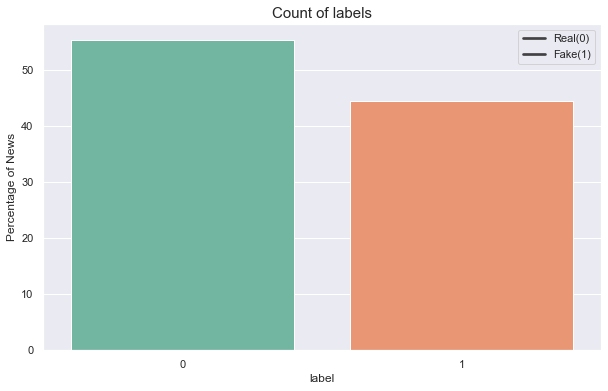

In [130]:
# Count plot for label
sns.set(style="darkgrid")
plt.figure(figsize=(10,6))
ax = sns.barplot(x=df_nto_to.label, y=df_nto_to.label, palette = "Set2", data=df_nto_to, estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percentage of News")
plt.title('Count of labels', fontsize=15)
plt.legend(labels=["Real(0)","Fake(1)"])
plt.show()

In the above plot we could see around 10% difference in the data between real and fake news.As the difference is less we dont feel the dataset is largly imbalanced.

Text(0.5, 1.0, 'Top 10 Authors')

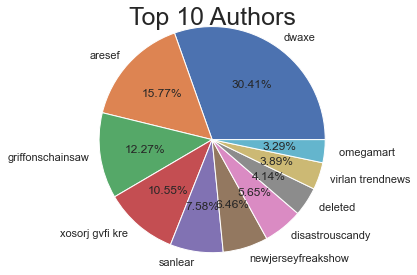

In [69]:
# Plot Pie Chart 
#author_names = df_nto_to.author.value_counts().index
author_val = df_nto_to['author'].value_counts().reset_index()
plt.pie(author_val['author'][:10],labels = author_val['index'][:10],autopct = '%1.2f%%', radius = 1.3)
plt.title('Top 10 Authors', fontsize=25)

In the above pie chart we could see the top 10 authors who posted most posts on Reddit irrespective to fake or real news.

Text(0.5, 1.0, 'Word Cloud for Fake(TheOnion) News')

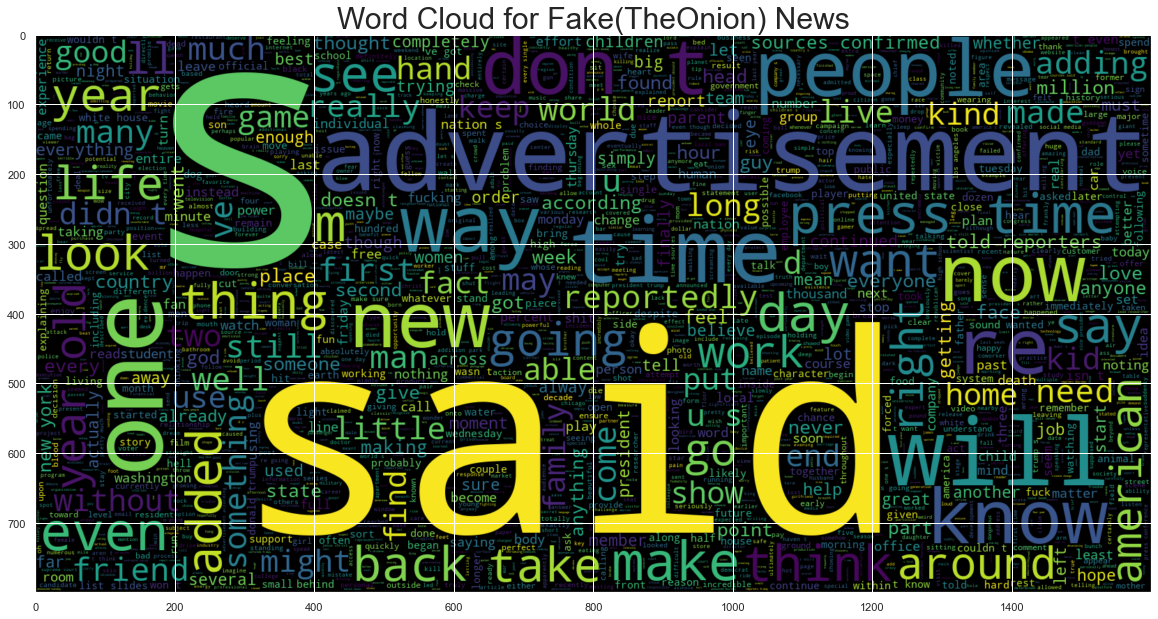

In [70]:
# Word Cloud for Fake News
plt.figure(figsize = (20,20)) # Text that is Fake
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(df_nto_to[df_nto_to.label == 1].post_body))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Word Cloud for Fake(TheOnion) News', fontsize=30)

From the above word cloud for Fake(TheOnion) news, we could see most used words like said,people,advertisement,press,will etc.

Text(0.5, 1.0, 'Word Cloud for Real(NotTheOnion) News')

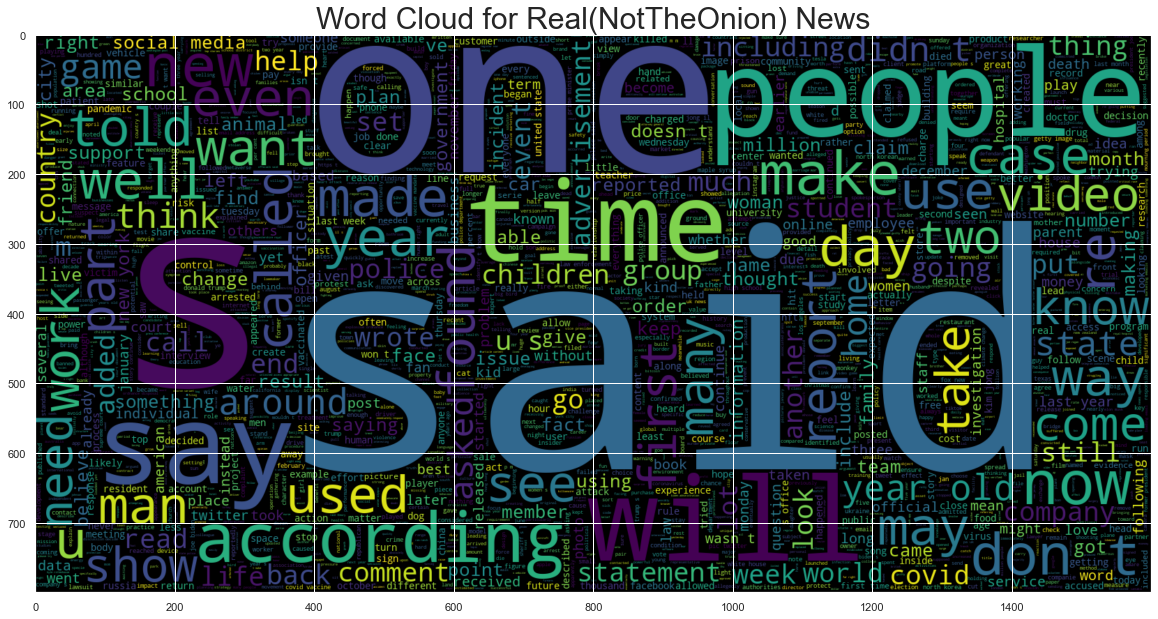

In [71]:
# Word Cloud for Real News 
plt.figure(figsize = (20,20)) # Text that is Real
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(df_nto_to[df_nto_to.label == 0].post_body))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Word Cloud for Real(NotTheOnion) News', fontsize=30)

In the above word cloud for Real(NotTheOnion) news, we could see most used words like said, one, say, people, found, first, make, new, according, day etc. 

Text(0.5, 1.0, 'Top 5 Scored Authors')

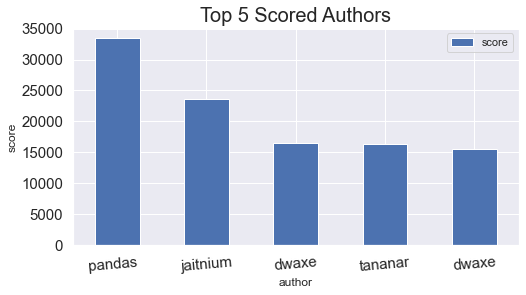

In [72]:
# Bar plot to check top 5 authors with respect to score
top_5 = df_nto_to.sort_values(by="score", ascending=False).head()
top_5.plot(x="author", y="score", kind="bar", rot=5, ylabel = "score", figsize =(8,4), fontsize=15)
plt.title("Top 5 Scored Authors", fontsize = 20)

Text(0.5, 1.0, 'Top 5 Authors w.r.to Number of Comments')

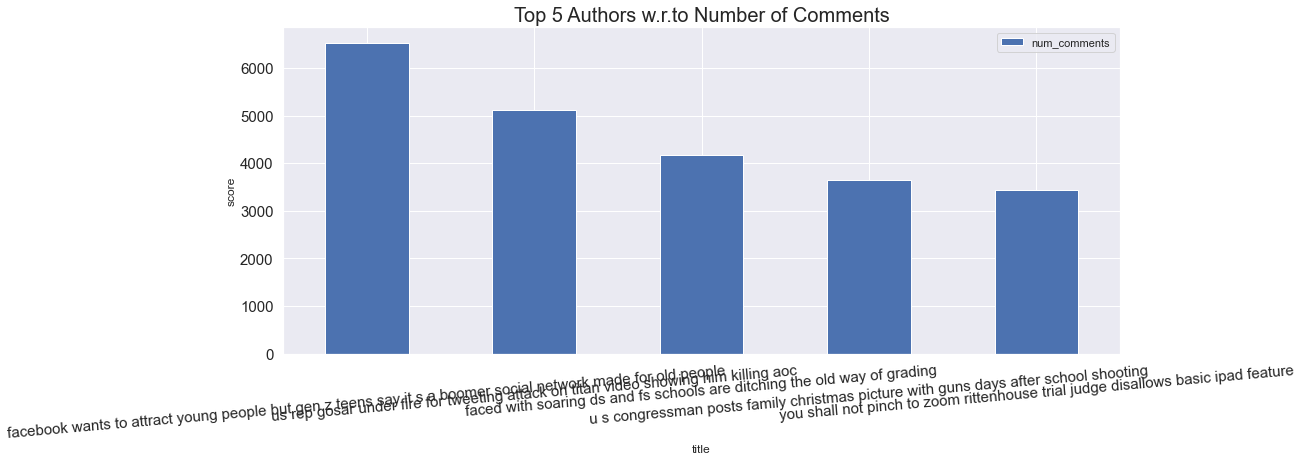

In [73]:
# Bar plot to check top 5 authors with respect to number of comments
top_5 = df_nto_to.sort_values(by="num_comments", ascending=False).head()
top_5.plot(x="title", y="num_comments", kind="bar", rot=5, ylabel = "score", figsize =(15,6), fontsize=15)
plt.title("Top 5 Authors w.r.to Number of Comments", fontsize = 20)

In [36]:
# Converting local_time_month into categorical variable

cat_months = pd.cut(df_nto_to.local_time_month,bins=[1,3,6,9,12],labels=['Q1','Q2','Q3','Q4'])
df_nto_to.insert(7,'months_quarter',cat_months)

In [37]:
# Checking the data
df_nto_to.head()

,title,post_body,author,num_comments,score,label,local_time_year,months_quarter,local_time_month
0,Parents Forced To Explain Thrill Of Having Sex...,SAN DIEGOâ€”Instructing their confused 4-year-...,kremor,0,1,1,2022,Q1,2
1,Posh Restaurant Has Cucumber Slices Floating I...,Posh Restaurant Has Cucumber Slices Floating I...,El_Zarco,0,1,1,2022,Q1,2
2,Painted Rocksnail Knows It Really Fucked If An...,"WOLF CREEK, ALâ€”Reacting with dismay to news ...",Sanlear,0,1,1,2022,Q1,2
3,Why has The Onion gotten so much worse recenâ€”,Why has The Onion gotten so much worse recenâ€”,Additional_Barber_30,1,1,1,2022,Q1,2
4,Boarâ€™s Head Unveils New Funfetti Birthday Ham,"SARASOTA, FLâ€”In a statement that confirmed c...",heavyLobster,0,1,1,2022,Q1,2


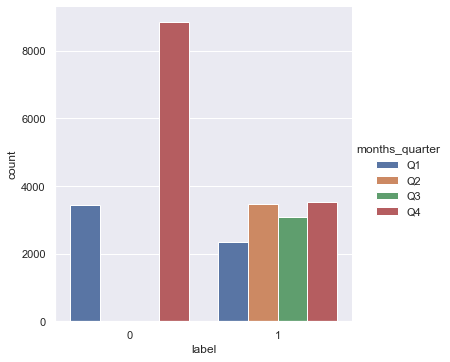

In [102]:
# Categorical plot to check the count of fake/real news posted in which Quarters of the year.
#sns.catplot(x="label", hue="months_quarter", kind="count", data=df_nto_to)
#As label 0 

From the above, we could say that more fake posts been posted in Reddit during Q2 & Q4 where as highest number real news posts has been posted during Q4.

In [75]:
corr = df_nto_to.corr()
corr.style.background_gradient(cmap='coolwarm')

,num_comments,score,label,local_time_year,local_time_month
num_comments,1.000000,0.208341,-0.054875,0.031509,0.075204
score,0.208341,1.000000,0.100517,-0.093397,0.002191
label,-0.054875,0.100517,1.000000,-0.792249,-0.019505
local_time_year,0.031509,-0.093397,-0.792249,1.000000,-0.174658
local_time_month,0.075204,0.002191,-0.019505,-0.174658,1.000000


In [74]:
df_nto_to.head()

,title,post_body,author,num_comments,score,label,local_time_year,local_time_month
0,parents forced to explain thrill of having sex...,san diego instructing their confused year ol...,kremor,0,1,1,2022,2
1,posh restaurant has cucumber slices floating i...,posh restaurant has cucumber slices floating i...,el zarco,0,1,1,2022,2
2,painted rocksnail knows it really fucked if an...,wolf creek al reacting with dismay to news th...,sanlear,0,1,1,2022,2
3,why has the onion gotten so much worse recen,why has the onion gotten so much worse recen,additional barber,1,1,1,2022,2
4,boar s head unveils new funfetti birthday ham,sarasota fl in a statement that confirmed cus...,heavylobster,0,1,1,2022,2


In [76]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df_nto_to)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

MemoryError: Unable to allocate 2.90 GiB for an array with shape (24307,) and data type <U32031

# Preprocessing World News Dataset

In [190]:
# Reading Not The Onion CSV File
df_wn = pd.read_csv("worldnews.csv")

In [102]:
df_wn.shape

(19966, 9)

In [166]:
df_wn.head()

,Unnamed: 0,author,created_utc,id,num_comments,score,title,url,post_body
0,0,Ragvard_Grimclaw,1646938242,tb5ozz,1,1,One of the first British fighters in Ukraine t...,https://www.thesun.co.uk/news/17899587/ukraine...,ONE of the first British fighters in Ukraine t...
1,1,Sweep145,1646938217,tb5opi,0,1,People are attacking each other for food as Ru...,https://www.businessinsider.com/russia-bombard...,Locals in the besieged Ukrainian city of Mariu...
2,2,egeym,1646938203,tb5oik,0,1,"Turkey's dialogue with Ukraine, Russia is impo...",https://www.reuters.com/world/turkeys-dialogue...,U.S. President Joe Biden and Turkey's Presiden...
3,3,[deleted],1646938188,tb5obu,0,1,"Turkey&amp;#x27;s dialogue with Ukraine, Russi...",https://www.reuters.com/world/turkeys-dialogue...,U.S. President Joe Biden and Turkey's Presiden...
4,4,a1b0r,1646938187,tb5obl,0,1,Why won't the world fight for us? Question and...,https://en.lb.ua/news/2022/03/05/10153_why_won...,"We are opening a new permanent column, ""questi..."


In [191]:
# Rearranging the columns

df_wn = df_wn[['title','post_body','author','num_comments','score','created_utc']]

df_wn

,title,post_body,author,num_comments,score,created_utc
0,One of the first British fighters in Ukraine t...,ONE of the first British fighters in Ukraine t...,Ragvard_Grimclaw,1,1,1646938242
1,People are attacking each other for food as Ru...,Locals in the besieged Ukrainian city of Mariu...,Sweep145,0,1,1646938217
2,"Turkey's dialogue with Ukraine, Russia is impo...",U.S. President Joe Biden and Turkey's Presiden...,egeym,0,1,1646938203
3,"Turkey&amp;#x27;s dialogue with Ukraine, Russi...",U.S. President Joe Biden and Turkey's Presiden...,[deleted],0,1,1646938188
4,Why won't the world fight for us? Question and...,"We are opening a new permanent column, ""questi...",a1b0r,0,1,1646938187
...,...,...,...,...,...,...
19961,Musk donated over $5.7 bln in Tesla shares to ...,"SAN FRANCISCO, Feb 14 (Reuters) - Tesla chief ...",Subdued_Volatility,0,1,1644904194
19962,Jenazah Kepala BIN Papua Diantar Ke Jakarta Je...,Jenazah Kepala BIN Papua Diantar Ke Jakarta\n\...,akmazona,0,1,1644904185
19963,US offers Ukraine $1 billion loan guarantee,Secretary of State Antony Blinken Antony Blink...,bakert12,0,1,1644903965
19964,iPhone XS Giveaway Contest - Enter to Win an i...,So guys get ready for this fantastic chance to...,Maggie-O-Grillo,1,1,1644903674


In [168]:
df_wn.isna().any()

title           False
post_body        True
author          False
num_comments    False
score           False
created_utc     False
dtype: bool

In [106]:
df_wn.isna().sum()

title              0
post_body       1526
author             0
num_comments       0
score              0
created_utc        0
dtype: int64

In [192]:
# Replacing na values in post_body attribute with data from the title attribute w.r.to same index & row
df_wn.post_body.fillna(df_wn.title, inplace=True)

In [108]:
# Printing number of unique values each column has 

df_wn.nunique(dropna = True)

title           18002
post_body       15320
author           6558
num_comments        8
score              15
created_utc     19736
dtype: int64

In [109]:
df_wn.isna().sum()

title           0
post_body       0
author          0
num_comments    0
score           0
created_utc     0
dtype: int64

In [110]:
df_wn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19966 entries, 0 to 19965
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         19966 non-null  object
 1   post_body     19966 non-null  object
 2   author        19966 non-null  object
 3   num_comments  19966 non-null  int64 
 4   score         19966 non-null  int64 
 5   created_utc   19966 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 936.0+ KB


In [193]:
# Function to clean data

def clean_wndata(wn):
    # Replacing not upper case & not lower case letters with space
    df_wn['title'] = df_wn['title'].str.replace('[^A-Za-z]',' ')
    df_wn['post_body'] = df_wn['post_body'].str.replace('[^A-Za-z]',' ')
    df_wn['author'] = df_wn['author'].str.replace('[^A-Za-z]',' ')

    # Replacing \w\s(not word not white space group) with space
    df_wn['title'] = df_wn['title'].str.replace('[^\w\s]',' ')
    df_wn['post_body'] = df_wn['post_body'].str.replace('[^\w\s]',' ')
    df_wn['author'] = df_wn['author'].str.replace('[^\w\s]',' ')
    
    
    # Removing the double spaces between the words
    df_wn['title'] = df_wn['title'].str.replace(" "," ")
    df_wn['post_body'] = df_wn['post_body'].str.replace(" "," ")
    df_wn['author'] = df_wn['author'].str.replace(" "," ")
    
    # Transform all text to lowercase
    df_wn['title'] = df_wn['title'].str.lower()
    df_wn['post_body'] = df_wn['post_body'].str.lower()
    df_wn['author'] = df_wn['author'].str.lower()
    
    print("New shape:", wn.shape)
    return wn.head()

In [194]:
# Call clean_data
clean_wndata(df_wn)

# Printing new shape of the data
print("\n", df_wn.shape)

New shape: (19966, 6)

 (19966, 6)


In [195]:
df_wn.head()

,title,post_body,author,num_comments,score,created_utc
0,one of the first british fighters in ukraine t...,one of the first british fighters in ukraine t...,ragvard grimclaw,1,1,1646938242
1,people are attacking each other for food as ru...,locals in the besieged ukrainian city of mariu...,sweep,0,1,1646938217
2,turkey s dialogue with ukraine russia is impo...,u s president joe biden and turkey s presiden...,egeym,0,1,1646938203
3,turkey amp x s dialogue with ukraine russi...,u s president joe biden and turkey s presiden...,deleted,0,1,1646938188
4,why won t the world fight for us question and...,we are opening a new permanent column questi...,a b r,0,1,1646938187


In [119]:
df_wn.loc[df_wn.author == ' deleted ', 'author'].count()

0

In [118]:
df_wn['author'] = df_wn['author'].replace([' deleted '],'unknown')

In [121]:
# Converting UTC to EST

#df_time = pd.read_csv("semi_processed_nto_to.csv")
utc_list = df_wn['created_utc'].to_list()
local_time_year = []
local_time_month = []
local_time_day = []
local_time_hour = []
local_time_minute = []
local_time_seconds = []

for utc in utc_list:    
    lt = datetime.datetime.fromtimestamp(utc)
    lt_str = str(lt)    
    time_date_array = lt_str.split(' ', 2)
    date = time_date_array[0]
    time = time_date_array[1]
    date_array = date.split('-', 3)
    time_array = time.split(':', 3)
        
    local_time_year.append(date_array[0])
    local_time_month.append(date_array[1])
    local_time_day.append(date_array[2])

    local_time_hour.append(time_array[0])
    local_time_minute.append(time_array[1])
    local_time_seconds.append(time_array[2])
    

df_wn['local_time_year'] = local_time_year
df_wn['local_time_month'] = local_time_month
df_wn['local_time_day'] = local_time_day
df_wn['local_time_hour'] = local_time_hour
df_wn['local_time_minute'] = local_time_minute
df_wn['local_time_second'] = local_time_seconds

# Savving the converted time into a new csv file
df_wn.to_csv('preprocessed_worldnews.csv', index = False)

In [122]:
df_wn_data = pd.read_csv("preprocessed_worldnews.csv")

In [123]:
print("\n",df_wn_data.shape)
df_wn_data.head()


 (19966, 12)


,title,post_body,author,num_comments,score,created_utc,local_time_year,local_time_month,local_time_day,local_time_hour,local_time_minute,local_time_second
0,one of the first british fighters in ukraine t...,one of the first british fighters in ukraine t...,ragvard grimclaw,1,1,1646938242,2022,3,10,13,50,42
1,people are attacking each other for food as ru...,locals in the besieged ukrainian city of mariu...,sweep,0,1,1646938217,2022,3,10,13,50,17
2,turkey s dialogue with ukraine russia is impor...,u s president joe biden and turkey s president...,egeym,0,1,1646938203,2022,3,10,13,50,3
3,turkey amp x s dialogue with ukraine russia i...,u s president joe biden and turkey s president...,unknown,0,1,1646938188,2022,3,10,13,49,48
4,why won t the world fight for us question and ...,we are opening a new permanent column questio...,a b r,0,1,1646938187,2022,3,10,13,49,47


In [124]:
df_wn_data = df_wn_data.drop(columns = ["created_utc","local_time_hour","local_time_day","local_time_minute","local_time_second"])

In [125]:
df_wn_data.head()

,title,post_body,author,num_comments,score,local_time_year,local_time_month
0,one of the first british fighters in ukraine t...,one of the first british fighters in ukraine t...,ragvard grimclaw,1,1,2022,3
1,people are attacking each other for food as ru...,locals in the besieged ukrainian city of mariu...,sweep,0,1,2022,3
2,turkey s dialogue with ukraine russia is impor...,u s president joe biden and turkey s president...,egeym,0,1,2022,3
3,turkey amp x s dialogue with ukraine russia i...,u s president joe biden and turkey s president...,unknown,0,1,2022,3
4,why won t the world fight for us question and ...,we are opening a new permanent column questio...,a b r,0,1,2022,3


In [126]:
df_wn_data.isna().sum()

title               0
post_body           0
author              0
num_comments        0
score               0
local_time_year     0
local_time_month    0
dtype: int64

In [127]:
df_wn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19966 entries, 0 to 19965
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   title             19966 non-null  object
 1   post_body         19966 non-null  object
 2   author            19966 non-null  object
 3   num_comments      19966 non-null  int64 
 4   score             19966 non-null  int64 
 5   local_time_year   19966 non-null  int64 
 6   local_time_month  19966 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 1.1+ MB


# Exploratory Data Analysis for World News Data

In [199]:
df_wn_data['author'].describe()

count       19966
unique       6532
top       unknown
freq          480
Name: author, dtype: object

Text(0.5, 1.0, 'Top 10 Authors')

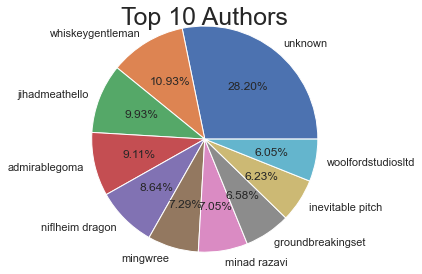

In [128]:
# Plot Pie Chart 
#author_names = df_nto_to.author.value_counts().index
author = df_wn_data['author'].value_counts().reset_index()
plt.pie(author['author'][:10],labels = author['index'][:10],autopct = '%1.2f%%', radius = 1.3)
plt.title('Top 10 Authors', fontsize=25)

From the above Pie chart we could see the top 10 authors with percentages where we have 28.20% author with unknown name.

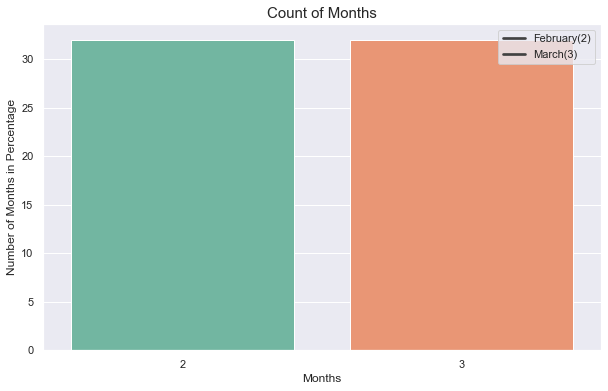

In [209]:
# Count plot for label
sns.set(style="darkgrid")
plt.figure(figsize=(10,6))
ax = sns.barplot(x=df_wn_data.local_time_month, y=df_wn_data.local_time_month, palette = "Set2", data=df_wn_data, estimator=lambda x: len(x) / len(df) * 100)
ax.set(xlabel = "Months", ylabel="Number of Months in Percentage")
plt.title('Count of Months', fontsize=15)
plt.legend(labels=["February(2)", "March(3)"])
plt.show()

From the above count plot we could see that all the posts were been posted in the months of 2 (February) & 3 (March)

Text(0.5, 1.0, 'Word Cloud for World News')

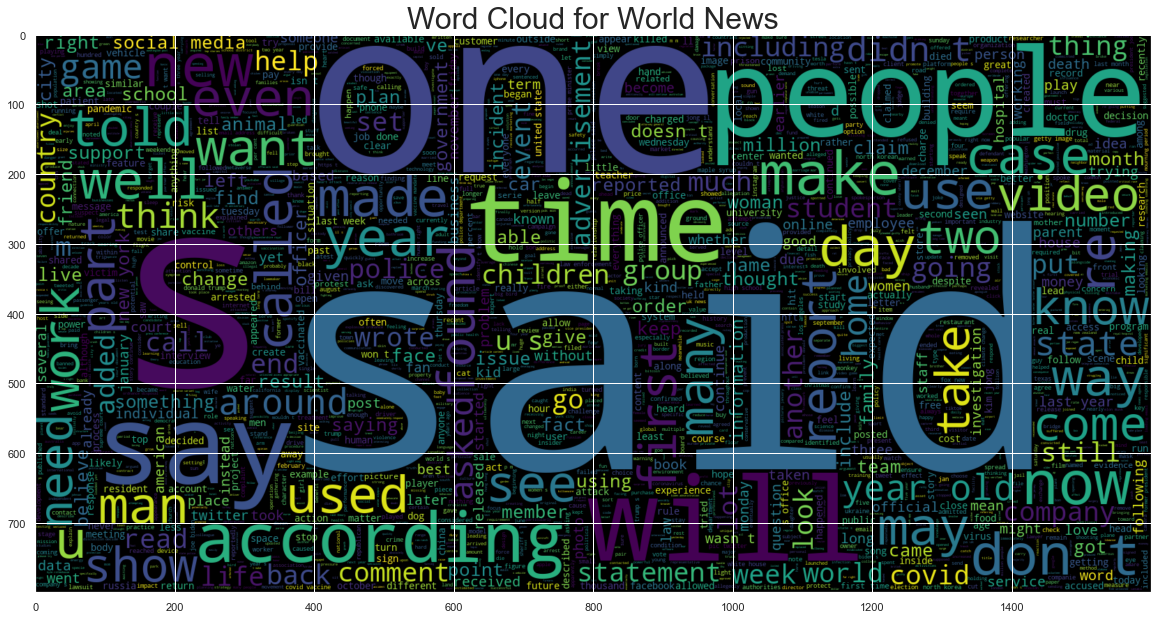

In [206]:
# Word Cloud for World News 
plt.figure(figsize = (20,20)) # Text that is Real
wc_wn = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(df_wn_data.post_body))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Word Cloud for World News', fontsize=30)

From the above word cloud we could see that most occured words in body of the post are said, time, children, told, want, well etc.

Text(0.5, 1.0, 'Top 5 Scored Authors')

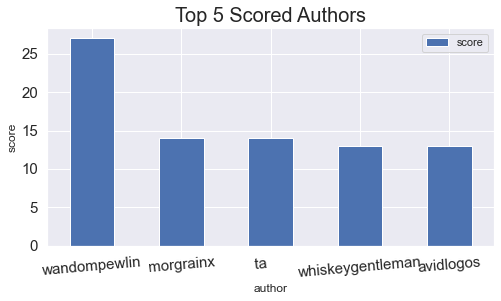

In [210]:
# Bar plot to check top 5 authors with respect to score
top_5 = df_wn_data.sort_values(by="score", ascending=False).head()
top_5.plot(x="author", y="score", kind="bar", rot=5, ylabel = "score", figsize =(8,4), fontsize=15)
plt.title("Top 5 Scored Authors", fontsize = 20)

Text(0.5, 1.0, 'Top 5 Authors w.r.to Number of Comments')

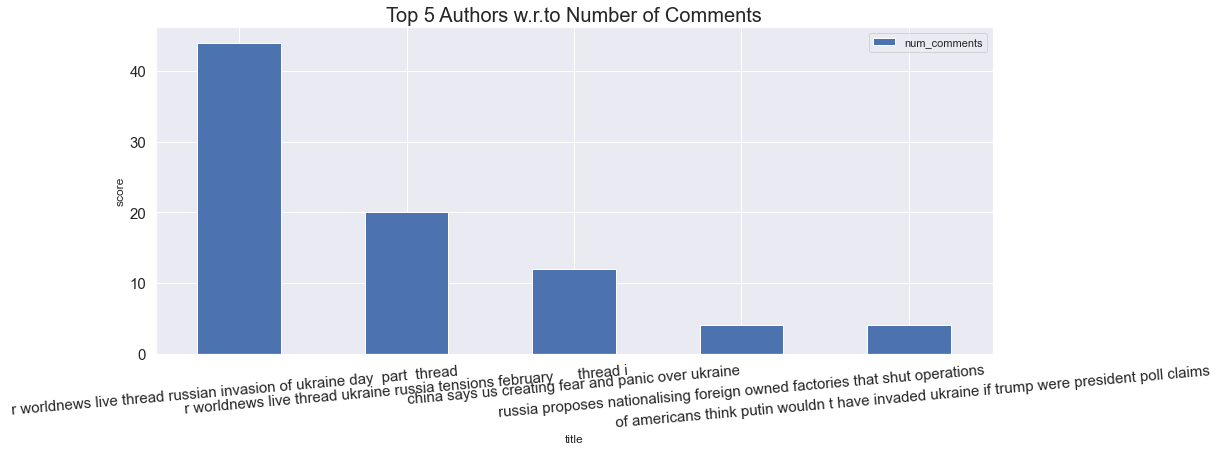

In [211]:
# Bar plot to check top 5 authors with respect to number of comments
top_5 = df_wn_data.sort_values(by="num_comments", ascending=False).head()
top_5.plot(x="title", y="num_comments", kind="bar", rot=5, ylabel = "score", figsize =(15,6), fontsize=15)
plt.title("Top 5 Authors w.r.to Number of Comments", fontsize = 20)

## NLP Preprocessing for Fake/Real News Data

In [224]:
from nltk.corpus import stopwords
import langdetect 
import nltk
from nltk.stem.snowball import SnowballStemmer

In [225]:
# Checking the language of the row 15

txt_title = df_nto_to["title"].iloc[22]
txt_postbdy = df_nto_to["post_body"].iloc[15]

print(txt_title, " --> ", langdetect.detect(txt_title))
print("\n")
print(txt_postbdy, " --> ", langdetect.detect(txt_postbdy))

undercover boss to be canceled because  influencers  entered workforce  -->  en


puppy bowl competitors hide under couch during terrifying halftime fireworks display  -->  en


In [226]:
# Detecting language on whole data and Creating new columns with language information
df_nto_to['lang_postbdy'] = df_nto_to["post_body"].apply(lambda x: langdetect.detect(x) if 
                                 x.strip() != "" else "")
df_nto_to.head()

,title,post_body,author,num_comments,score,label,local_time_year,local_time_month,lang_postbdy
0,parents forced to explain thrill of having sex...,san diego instructing their confused year ol...,kremor,0,1,1,2022,2,en
1,posh restaurant has cucumber slices floating i...,posh restaurant has cucumber slices floating i...,el zarco,0,1,1,2022,2,en
2,painted rocksnail knows it really fucked if an...,wolf creek al reacting with dismay to news th...,sanlear,0,1,1,2022,2,en
3,why has the onion gotten so much worse recen,why has the onion gotten so much worse recen,additional barber,1,1,1,2022,2,en
4,boar s head unveils new funfetti birthday ham,sarasota fl in a statement that confirmed cus...,heavylobster,0,1,1,2022,2,en


In [228]:
# Filtering only english from post_body
df_nto_to = df_nto_to[df_nto_to["lang_postbdy"]=="en"]

In [229]:
df_nto_to = df_nto_to.drop(columns = ['lang_postbdy'])

In [230]:
print(df_nto_to.shape)

(30939, 8)


## STOP WORDS

In [231]:
stop = stopwords.words('english')

In [232]:
df_nto_to['post_body_stop'] = df_nto_to['post_body'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [233]:
df_nto_to.head()

,title,post_body,author,num_comments,score,label,local_time_year,local_time_month,post_body_stop
0,parents forced to explain thrill of having sex...,san diego instructing their confused year ol...,kremor,0,1,1,2022,2,san diego instructing confused year old point ...
1,posh restaurant has cucumber slices floating i...,posh restaurant has cucumber slices floating i...,el zarco,0,1,1,2022,2,posh restaurant cucumber slices floating jug h...
2,painted rocksnail knows it really fucked if an...,wolf creek al reacting with dismay to news th...,sanlear,0,1,1,2022,2,wolf creek al reacting dismay news beloved mar...
3,why has the onion gotten so much worse recen,why has the onion gotten so much worse recen,additional barber,1,1,1,2022,2,onion gotten much worse recen
4,boar s head unveils new funfetti birthday ham,sarasota fl in a statement that confirmed cus...,heavylobster,0,1,1,2022,2,sarasota fl statement confirmed customers turn...


## Tokenization

In [234]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Rakesh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [235]:
df_nto_to['tokenized_sents'] = df_nto_to.apply(lambda row: nltk.word_tokenize(row['post_body_stop']), axis=1)

In [236]:
df_nto_to['tokenized_sents']

0        [san, diego, instructing, confused, year, old,...
1        [posh, restaurant, cucumber, slices, floating,...
2        [wolf, creek, al, reacting, dismay, news, belo...
3                      [onion, gotten, much, worse, recen]
4        [sarasota, fl, statement, confirmed, customers...
                               ...                        
31199    [stellan, skarsg, rd, dune, warner, bros, baro...
31200    [donald, trump, jr, selling, shirts, web, site...
31201    [donald, trump, jr, begun, selling, merchandis...
31202    [donald, trump, jr, begun, selling, merchandis...
31203    [last, week, horrifying, tragedy, occurred, se...
Name: tokenized_sents, Length: 30939, dtype: object

## Stemming

In [237]:
stemmer = SnowballStemmer("english")

In [238]:
df_nto_to['stemmed'] = df_nto_to['tokenized_sents'].apply(lambda x: [stemmer.stem(y) for y in x])

In [239]:
df_nto_to['stemmed'][0]

['san',
 'diego',
 'instruct',
 'confus',
 'year',
 'old',
 'point',
 'stare',
 'primat',
 'san',
 'diego',
 'zoo',
 'local',
 'parent',
 'jen',
 'mark',
 'haskel',
 'report',
 'forc',
 'explain',
 'thrill',
 'sex',
 'public',
 'daughter',
 'wednesday',
 'pair',
 'monkey',
 'start',
 'mate',
 'front',
 'honey',
 'right',
 'mommi',
 'monkey',
 'daddi',
 'monkey',
 'make',
 'babi',
 'realli',
 'realli',
 'like',
 'watch',
 'said',
 'mother',
 'jen',
 'haskel',
 'ad',
 'male',
 'monkey',
 'proceed',
 'scream',
 'growl',
 'mount',
 'femal',
 'companion',
 'clear',
 'exhibitionist',
 'got',
 'spectacl',
 'know',
 'might',
 'make',
 'sens',
 'deep',
 'monkey',
 'want',
 'laugh',
 'scream',
 'take',
 'pictur',
 'play',
 'complex',
 'psychosexu',
 'game',
 'sometim',
 'vanilla',
 'stuff',
 'enough',
 'mommi',
 'daddi',
 'monkey',
 'anymor',
 'front',
 'crowd',
 'coupl',
 'dozen',
 'unsuspect',
 'famili',
 'public',
 'area',
 'thing',
 'get',
 'feel',
 'true',
 'sexual',
 'pleasur',
 'anymor',


# Length Analysis

In [240]:
df_nto_to['word_count'] = df_nto_to["stemmed"].apply(lambda x: len(str(x).split(" ")))
df_nto_to['char_count'] = df_nto_to["stemmed"].apply(lambda x: sum(len(word) for word in str(x).split(" ")))
df_nto_to['avg_word_length'] = df_nto_to['char_count'] / df_nto_to['word_count']

In [241]:
df_nto_to.shape

(30939, 14)

## Lemmatization

In [242]:
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer

wordnet_lemmatizer = WordNetLemmatizer()
df_nto_to['lemmatized'] = df_nto_to['tokenized_sents'].apply(lambda x: [wordnet_lemmatizer.lemmatize(y) for y in x])
df_nto_to['lemmatized'][0]

['san',
 'diego',
 'instructing',
 'confused',
 'year',
 'old',
 'point',
 'stare',
 'primate',
 'san',
 'diego',
 'zoo',
 'local',
 'parent',
 'jen',
 'mark',
 'haskell',
 'reportedly',
 'forced',
 'explain',
 'thrill',
 'sex',
 'public',
 'daughter',
 'wednesday',
 'pair',
 'monkey',
 'started',
 'mating',
 'front',
 'honey',
 'right',
 'mommy',
 'monkey',
 'daddy',
 'monkey',
 'making',
 'baby',
 'really',
 'really',
 'like',
 'watching',
 'said',
 'mother',
 'jen',
 'haskell',
 'adding',
 'male',
 'monkey',
 'proceeded',
 'scream',
 'growl',
 'mount',
 'female',
 'companion',
 'clearly',
 'exhibitionist',
 'got',
 'spectacle',
 'know',
 'might',
 'make',
 'sense',
 'deep',
 'monkey',
 'want',
 'laugh',
 'scream',
 'take',
 'picture',
 'play',
 'complex',
 'psychosexual',
 'game',
 'sometimes',
 'vanilla',
 'stuff',
 'enough',
 'mommy',
 'daddy',
 'monkey',
 'anymore',
 'front',
 'crowd',
 'couple',
 'dozen',
 'unsuspecting',
 'family',
 'public',
 'area',
 'thing',
 'get',
 'feel',

## Tf-idf Vectorizer

In [243]:
#create a dummy function to return text as the text is already tokenized.
def dummy(doc):
    return doc

#Setting min_df and max_df removes unnecessary words.
vectorizer = TfidfVectorizer(
    analyzer='word',
    tokenizer=dummy,
    preprocessor = dummy,
    token_pattern = str,
    min_df = 0.01,
    max_df = 0.8)

NameError: name 'TfidfVectorizer' is not defined

## NLP Preprocessing for Worldnews Data

In [49]:
# Checking the language of the row 15

txt_wn_title = df_wn_data["title"].iloc[22]
txt_wn_postbdy = df_wn_data["post_body"].iloc[15]

print(txt_wn_title, " --> ", langdetect.detect(txt_wn_title))
print("\n")
print(txt_wn_postbdy, " --> ", langdetect.detect(txt_wn_postbdy))

 complete catastrophe  mariupol suffers under russian siege  -->  it


summary artillery pgms said to strike ukrainian hospitals apartments chinese and u s intelligence surprised by stout resistance fears of escalation if u s tranfers polish migs washington march   reuters  russian forces are operating with reckless disregard for civilians as they face stronger than expected resistance in ukraine and american intelligence agencies are tracking their actions to hold them to account u s director of national intelligence avril haines said on thursday  the russian military has begun to loosen its rules of engagement to achieve their military objectives  haines told the senate intelligence committee s annual hearing on worldwide threats to u s security  haines a cabinet level official who heads the u s intelligence agencies said intelligence officers were documenting russia s actions in order to hold to account both the government in moscow and individuals responsible for assaults on civili

In [50]:
# Detecting language on whole data and Creating new columns with language information
df_wn_data['lang_postbdy'] = df_wn_data["post_body"].apply(lambda x: langdetect.detect(x) if 
                                 x.strip() != "" else "")
df_wn_data.head()

,title,post_body,author,num_comments,score,local_time_year,local_time_month,local_time_day,local_time_hour,lang_postbdy
0,one of the first british fighters in ukraine t...,one of the first british fighters in ukraine t...,ragvard grimclaw,1,1,2022,3,10,13,en
1,people are attacking each other for food as ru...,locals in the besieged ukrainian city of mariu...,sweep,0,1,2022,3,10,13,en
2,turkey s dialogue with ukraine russia is impor...,u s president joe biden and turkey s president...,egeym,0,1,2022,3,10,13,en
3,turkey amp x s dialogue with ukraine russia i...,u s president joe biden and turkey s president...,deleted,0,1,2022,3,10,13,en
4,why won t the world fight for us question and ...,we are opening a new permanent column questio...,a b r,0,1,2022,3,10,13,en


In [52]:
# Filtering only english from post_body
df_wn_data = df_wn_data[df_wn_data["lang_postbdy"]=="en"]

df_wn_data = df_wn_data.drop(columns = ['lang_postbdy'])

print(df_wn_data.shape)

(19276, 9)


In [53]:
stop = stopwords.words('english')

df_wn_data['post_body_stop'] = df_wn_data['post_body'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

df_wn_data.head()

,title,post_body,author,num_comments,score,local_time_year,local_time_month,local_time_day,local_time_hour,post_body_stop
0,one of the first british fighters in ukraine t...,one of the first british fighters in ukraine t...,ragvard grimclaw,1,1,2022,3,10,13,one first british fighters ukraine told yester...
1,people are attacking each other for food as ru...,locals in the besieged ukrainian city of mariu...,sweep,0,1,2022,3,10,13,locals besieged ukrainian city mariupol starte...
2,turkey s dialogue with ukraine russia is impor...,u s president joe biden and turkey s president...,egeym,0,1,2022,3,10,13,u president joe biden turkey president tayyip ...
3,turkey amp x s dialogue with ukraine russia i...,u s president joe biden and turkey s president...,deleted,0,1,2022,3,10,13,u president joe biden turkey president tayyip ...
4,why won t the world fight for us question and ...,we are opening a new permanent column questio...,a b r,0,1,2022,3,10,13,opening new permanent column question answer m...


In [54]:
#nltk.download('punkt')

df_wn_data['tokenized_sents'] = df_wn_data.apply(lambda row: nltk.word_tokenize(row['post_body_stop']), axis=1)

df_wn_data['tokenized_sents']

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Rakesh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0        [one, first, british, fighters, ukraine, told,...
1        [locals, besieged, ukrainian, city, mariupol, ...
2        [u, president, joe, biden, turkey, president, ...
3        [u, president, joe, biden, turkey, president, ...
4        [opening, new, permanent, column, question, an...
                               ...                        
19960    [paris, switched, first, noise, radar, part, p...
19961    [san, francisco, feb, reuters, tesla, chief, e...
19963    [secretary, state, antony, blinken, antony, bl...
19964    [guys, get, ready, fantastic, chance, win, bra...
19965    [antarctica, two, native, flowering, plants, s...
Name: tokenized_sents, Length: 19276, dtype: object

In [55]:
## Stemming

stemmer = SnowballStemmer("english")

df_wn_data['stemmed'] = df_wn_data['tokenized_sents'].apply(lambda x: [stemmer.stem(y) for y in x])

df_wn_data['stemmed'][0]

['one',
 'first',
 'british',
 'fighter',
 'ukrain',
 'told',
 'yesterday',
 'feroci',
 'battl',
 'russian',
 'troop',
 'battl',
 'antonov',
 'ex',
 'armi',
 'medic',
 'jason',
 'haigh',
 'exchang',
 'gunfir',
 'red',
 'armi',
 'sought',
 'seiz',
 'airport',
 'later',
 'beaten',
 'guard',
 'terrifi',
 'interrog',
 'one',
 'first',
 'british',
 'fighter',
 'ukrain',
 'told',
 'yesterday',
 'feroci',
 'battl',
 'russian',
 'troop',
 'ex',
 'armi',
 'medic',
 'jason',
 'haigh',
 'later',
 'beaten',
 'guard',
 'interrog',
 'jason',
 'said',
 'putin',
 'terror',
 'jason',
 'serv',
 'two',
 'tour',
 'iraq',
 'told',
 'sun',
 'ukrainian',
 'fought',
 'like',
 'lion',
 'proud',
 'alongsid',
 'putin',
 'terror',
 'bomb',
 'kid',
 'famili',
 'noth',
 'war',
 'crimin',
 'flew',
 'ukrain',
 'start',
 'last',
 'month',
 'recal',
 'told',
 'mate',
 'like',
 'mad',
 'qualifi',
 'combat',
 'medic',
 'done',
 'seven',
 'year',
 'work',
 'privat',
 'militari',
 'contractor',
 'want',
 'go',
 'good',
 's

In [56]:
# Length Analysis

df_wn_data['word_count'] = df_wn_data["stemmed"].apply(lambda x: len(str(x).split(" ")))
df_wn_data['char_count'] = df_wn_data["stemmed"].apply(lambda x: sum(len(word) for word in str(x).split(" ")))
df_wn_data['avg_word_length'] = df_wn_data['char_count'] / df_wn_data['word_count']

df_wn_data.shape

(19276, 15)

In [57]:
## Lemmatization

from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer

wordnet_lemmatizer = WordNetLemmatizer()
df_wn_data['lemmatized'] = df_wn_data['tokenized_sents'].apply(lambda x: [wordnet_lemmatizer.lemmatize(y) for y in x])
df_wn_data['lemmatized'][0]

['one',
 'first',
 'british',
 'fighter',
 'ukraine',
 'told',
 'yesterday',
 'ferocious',
 'battle',
 'russian',
 'troop',
 'battle',
 'antonov',
 'ex',
 'army',
 'medic',
 'jason',
 'haigh',
 'exchanged',
 'gunfire',
 'red',
 'army',
 'sought',
 'seize',
 'airport',
 'later',
 'beaten',
 'guard',
 'terrifying',
 'interrogation',
 'one',
 'first',
 'british',
 'fighter',
 'ukraine',
 'told',
 'yesterday',
 'ferocious',
 'battle',
 'russian',
 'troop',
 'ex',
 'army',
 'medic',
 'jason',
 'haigh',
 'later',
 'beaten',
 'guard',
 'interrogated',
 'jason',
 'said',
 'putin',
 'terrorism',
 'jason',
 'served',
 'two',
 'tour',
 'iraq',
 'told',
 'sun',
 'ukrainian',
 'fought',
 'like',
 'lion',
 'proud',
 'alongside',
 'putin',
 'terrorism',
 'bombing',
 'kid',
 'family',
 'nothing',
 'war',
 'criminal',
 'flew',
 'ukraine',
 'start',
 'last',
 'month',
 'recalled',
 'told',
 'mate',
 'like',
 'mad',
 'qualified',
 'combat',
 'medic',
 'done',
 'seven',
 'year',
 'working',
 'private',
 '

In [ ]:
## Tf-idf Vectorizer

#create a dummy function to return text as the text is already tokenized.
def dummy(doc):
    return doc

#Setting min_df and max_df removes unnecessary words.
vectorizer = TfidfVectorizer(
    analyzer='word',
    tokenizer=dummy,
    preprocessor = dummy,
    token_pattern = str,
    min_df = 0.01,
    max_df = 0.8)

In [ ]:
#For Classification 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

#Train and test
X=df['lemmatized']
y=df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [ ]:
X_train_vectorized = vectorizer.fit_transform(X_train)
X_train_vectorized = pd.DataFrame(X_train_vectorized.toarray(), columns = vectorizer.get_feature_names())

X_test_vectorized = vectorizer.transform(X_test)

In [ ]:
print(X_train_vectorized.head())

In [ ]:
#Random forest model
rf = RandomForestClassifier()

#Fit model
rf.fit(X_train_vectorized, y_train)

#Get Scores
print('CV Score:', cross_val_score(rf, X_train_vectorized, y_train))
print('Training Accuracy:', rf.score(X_train_vectorized, y_train))
print('testing Accuracy:', rf.score(X_test_vectorized, y_test))

In [ ]:
#naive bayes model
nb = MultinomialNB()

#Fit model
nb.fit(X_train_vectorized, y_train)

#Get Scores
print('CV Score:', cross_val_score(nb, X_train_vectorized, y_train))
print('Training Accuracy:', nb.score(X_train_vectorized, y_train))
print('testing Accuracy:', nb.score(X_test_vectorized, y_test))
